# Tema de estudio
La divulgación de noticias falsas sobre política a nivel nacional e internacional es una amenaza que puede impactar la gobernabilidad de países y la seguridad global. A nivel
interno de un país puede generar polarización y manipulación de la opinión pública debilitando la confianza en instituciones democráticas. Esto puede llevar a influir en elecciones,
justificar medidas impopulares entre otras consecuencias. A nivel internacional, estas noticias pueden generar tensiones diplomáticas, influir en decisiones de política exterior y
ser usadas en campañas de desestabilización por parte de gobiernos o grupos específicos. Esta reflexión motivó a un grupo de académicos a recolectar y generar noticias con el fin
de utilizar aprendizaje automático para facilitar la detección de noticias falsas.



#1.Importación librerias

In [173]:
from nltk.stem import SnowballStemmer

In [ ]:
# Manejo de gráficas
!pip install scikit-plot

In [ ]:
!pip install loky

In [ ]:
!pip insatll --no-cache-dir joblib==1.3.2 scikit-learn==1.3.0



ERROR: unknown command "insatll" - maybe you meant "install"


In [174]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # Import the plot_tree function


In [175]:
# Natural Language Toolkit (NLTK) para trabajar con textos
import nltk
# Punkt permite separar un texto en frases (soporta español)
nltk.download('punkt')
# Punkt permite separar un texto en frases (soporta español)
nltk.download('punkt_tab')
# Descargar las palabras vacías en español
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')
print(stop_words[:10])  # Muestra algunas palabras vacías en español
# Descarga de WordNet para español con Open Multilingual WordNet
nltk.download('omw-1.4')
nltk.download('wordnet')

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [176]:
from collections import Counter

In [177]:
# Alternativa más moderna para lematización en español
!pip install spacy
!python -m spacy download es_core_news_sm
import spacy
nlp = spacy.load("es_core_news_sm")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 77.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [178]:
 #Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt


In [ ]:
!pip install ydata-profiling

  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [179]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

#2. Perfilamiento y entendimiento de los datos

#### 2.1 Carga de datos

In [181]:
file_path = "/content/fake_news_spanish.csv"
data_t = pd.read_csv(file_path, sep=";", encoding="utf-8")
# Mostrar las primeras filas para verificar
print(data_t.head())

   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  
0  El diario británico publicó este pasado jueves...  02/06/2023  
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023  
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022  
3  En política, igual que hay que negociar con lo...  03/01/2022  
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018  


Tipos de datos cargados

In [182]:
print(data_t.dtypes)  # Verifica los tipos de todas las columnas


ID             object
Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object


In [183]:
data_t

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022


In [184]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57063 non-null  object
 1   Label        57063 non-null  int64 
 2   Titulo       57047 non-null  object
 3   Descripcion  57063 non-null  object
 4   Fecha        57063 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


Las columnas que se presentan son el id de la noticia, el titulo, descripción y fecha de esta y finalmente el label que es la etiqueta de si son falsas o no si es 0 es falsa si es verdadera es 1.

In [185]:
print(data_t.columns)


Index(['ID', 'Label', 'Titulo', 'Descripcion', 'Fecha'], dtype='object')


#### Entendimiento de los Datos

Para entender las noticias, se realizan estadísticas descriptivas para poder obtener un análisis de los titulos y descripciones de estas.


In [186]:
import pandas as pd
from scipy import stats as st
# Crear una copia del DataFrame
textos = data_t.copy()
# Cantidad total de caracteres en el texto
textos['Conteo_T'] = textos["Titulo"].astype(str).apply(len)
# Longitud de cada palabra en el mensaje
textos['Longitudes_T'] = textos["Titulo"].astype(str).apply(lambda x: [len(word) for word in x.split()])
# Moda: La longitud de palabra más frecuente en cada mensaje
textos['Moda_T'] = textos['Longitudes_T'].apply(lambda x: st.mode(x, keepdims=True)[0][0] if x else None)
# Máximo y mínimo: Longitud de la palabra más larga y más corta en cada mensaje
textos['Max_T'] = textos['Longitudes_T'].apply(lambda x: max(x) if x else None)
textos['Min_T'] = textos['Longitudes_T'].apply(lambda x: min(x) if x else None)

# Cantidad total de caracteres en el texto
textos['Conteo_D'] = textos["Descripcion"].astype(str).apply(len)
# Longitud de cada palabra en el mensaje
textos['Longitudes_D'] = textos["Descripcion"].astype(str).apply(lambda x: [len(word) for word in x.split()])
# Moda: La longitud de palabra más frecuente en cada mensaje
textos['Moda_D'] = textos['Longitudes_D'].apply(lambda x: st.mode(x, keepdims=True)[0][0] if x else None)
# Máximo y mínimo: Longitud de la palabra más larga y más corta en cada mensaje
textos['Max_D'] = textos['Longitudes_D'].apply(lambda x: max(x) if x else None)
textos['Min_D'] = textos['Longitudes_D'].apply(lambda x: min(x) if x else None)

# Cantidad total de caracteres en el texto
textos['Conteo_F'] = textos["Fecha"].astype(str).apply(len)
# Longitud de cada palabra en el mensaje
textos['Longitudes_F'] = textos["Fecha"].astype(str).apply(lambda x: [len(word) for word in x.split()])
# Moda: La longitud de palabra más frecuente en cada mensaje
textos['Moda_F'] = textos['Longitudes_D'].apply(lambda x: st.mode(x, keepdims=True)[0][0] if x else None)
# Máximo y mínimo: Longitud de la palabra más larga y más corta en cada mensaje
textos['Max_F'] = textos['Longitudes_F'].apply(lambda x: max(x) if x else None)
textos['Min_F'] = textos['Longitudes_F'].apply(lambda x: min(x) if x else None)

# Mostrar las primeras filas
print(textos[["Titulo", 'Conteo_T', 'Moda_T', 'Max_T', 'Min_T']].head())
print(textos[["Descripcion", 'Conteo_D', 'Moda_D', 'Max_D', 'Min_D']].head())
print(textos[["Fecha", 'Conteo_F', 'Moda_F', 'Max_F', 'Min_F']].head())

                                              Titulo  Conteo_T  Moda_T  Max_T  \
0  'The Guardian' va con Sánchez: 'Europa necesit...        77       2      9   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...       104       2     10   
2  El 'Ahora o nunca' de Joan Fuster sobre el est...        77       2     10   
3  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...       110       1     12   
4  Puigdemont: 'No sería ninguna tragedia una rep...        72       3     11   

   Min_T  
0      2  
1      1  
2      1  
3      1  
4      2  
                                         Descripcion  Conteo_D  Moda_D  Max_D  \
0  El diario británico publicó este pasado jueves...       218       2     13   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...      3251       2     14   
2  El valencianismo convoca en Castelló su fiesta...       169       2     13   
3  En política, igual que hay que negociar con lo...       133       3     15   
4  En una entrevista en El Punt Avui, el l

In [187]:
textos

,ID,Label,Titulo,Descripcion,Fecha,Conteo_T,Longitudes_T,Moda_T,Max_T,Min_T,Conteo_D,Longitudes_D,Moda_D,Max_D,Min_D,Conteo_F,Longitudes_F,Moda_F,Max_F,Min_F
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,77,"[4, 9, 2, 3, 8, 7, 8, 3, 2, 7, 2, 3, 7]",2,9,2,218,"[2, 6, 9, 7, 4, 6, 6, 2, 9, 5, 3, 8, 10, 3, 3,...",2,13,1,10,[10],2,10,10
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,104,"[7, 3, 2, 8, 7, 2, 10, 2, 7, 1, 6, 2, 9, 2, 6,...",2,10,1,3251,"[7, 3, 2, 8, 7, 2, 10, 2, 7, 1, 6, 2, 9, 2, 6,...",2,14,1,10,[10],2,10,10
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,77,"[2, 6, 1, 6, 2, 4, 6, 5, 2, 8, 10, 6, 2, 4]",2,10,1,169,"[2, 13, 7, 2, 8, 2, 6, 6, 2, 13, 3, 6, 5, 2, 2...",2,13,2,10,[10],2,10,10
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,110,"[8, 7, 1, 7, 5, 3, 1, 2, 5, 1, 8, 4, 8, 2, 6, ...",1,12,1,133,"[2, 9, 5, 3, 3, 3, 8, 3, 3, 12, 3, 3, 8, 3, 3,...",3,15,2,10,[10],3,10,10
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,72,"[11, 3, 5, 7, 8, 3, 10, 2, 3, 11]",3,11,2,242,"[2, 3, 10, 2, 2, 4, 5, 2, 5, 2, 5, 2, 14, 2, 7...",2,14,1,10,[10],2,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021,116,"[2, 8, 3, 6, 7, 1, 2, 9, 2, 6, 3, 5, 2, 6, 5, ...",2,9,1,244,"[2, 8, 8, 3, 8, 3, 2, 8, 2, 2, 3, 11, 2, 8, 10...",2,12,1,10,[10],2,10,10
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020,100,"[2, 4, 7, 5, 2, 11, 2, 2, 9, 2, 6, 1, 2, 3, 3,...",2,11,1,314,"[2, 2, 7, 11, 3, 5, 1, 3, 9, 2, 5, 3, 5, 3, 3,...",3,11,1,10,[10],3,10,10
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018,90,"[7, 7, 4, 3, 8, 3, 4, 8, 2, 2, 5, 14, 11]",2,14,2,70,"[2, 11, 7, 2, 2, 7, 3, 2, 9, 4, 11]",2,11,2,10,[10],2,10,10
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022,118,"[3, 5, 6, 2, 2, 8, 2, 8, 1, 5, 4, 4, 2, 14, 2,...",2,16,1,232,"[8, 8, 3, 5, 2, 7, 1, 2, 5, 2, 6, 8, 2, 8, 1, ...",2,12,1,10,[10],2,10,10


####2.2 Completitud

In [188]:
((data_t.isnull().sum()/data_t.shape[0])).sort_values(ascending=False)

,0
Titulo,0.00028
ID,0.00000
Label,0.00000
Descripcion,0.00000
Fecha,0.00000


In [189]:
((data_t.isnull().sum())).sort_values(ascending=False)

,0
Titulo,16
ID,0
Label,0
Descripcion,0
Fecha,0


En donde se presentan datos faltantes es en el titulo esto puede significar que es una noticia falsa al no presentalo, este porcentaje es de 0,00028 que son 16 datos

#### 2.3 Duplicados

In [190]:
duplicated_rows = data_t.loc[data_t.duplicated(keep=False)]
duplicated_rows.sort_values(by=duplicated_rows.columns.tolist())

,ID,Label,Titulo,Descripcion,Fecha
24343,ID,0,El Nueva Canarias cierra filas con Rita Maestr...,El Comité Federal termina con una votación uná...,10/06/2023
29842,ID,0,El Nueva Canarias cierra filas con Rita Maestr...,El Comité Federal termina con una votación uná...,10/06/2023
1743,ID,0,Escándalo de corrupción salpica a líderes sind...,Un escándalo de corrupción ha salpicado a líde...,06/05/2023
2981,ID,0,Escándalo de corrupción salpica a líderes sind...,Un escándalo de corrupción ha salpicado a líde...,06/05/2023
18253,ID,0,Escándalo de corrupción salpica a líderes sind...,Un escándalo de corrupción ha salpicado a líde...,06/05/2023
...,...,...,...,...,...
9206,ID,1,¿Por qué las energías verdes están causando un...,El decreto 16/2019 liberaliza la implantación ...,12/04/2021
28272,ID,1,¿Qué son las políticas activas de empleo y por...,Las políticas activas de empleo fueron una de ...,12/04/2021
37769,ID,1,¿Qué son las políticas activas de empleo y por...,Las políticas activas de empleo fueron una de ...,12/04/2021
29781,ID,1,Àngels Barceló: 'Los demócratas somos muchos más',La periodista de la Cadena Ser se ha visto obl...,23/04/2021


In [191]:
duplicated_rows.shape[0]

875

Hay 875 filas duplicadas

In [192]:
duplicated_data = data_t.loc[data_t.duplicated(keep="first")]
duplicated_data.shape[0]

445

Los datos que se repiten en las 875 filas duplicadas son 445 datos

In [193]:
conteo_clases = data_t['Label'].value_counts()
print(conteo_clases)
porcentaje_clases = conteo_clases / len(data_t) * 100
print(porcentaje_clases)

Label
1    33158
0    23905
Name: count, dtype: int64
Label
1    58.107706
0    41.892294
Name: count, dtype: float64


Se evidencia que se presenta un desbalance de datos puesto a que se presenta una mayor cantidad de label 1(noticias verdaderas), para esto se realizara un balanceo de clases con smote, esto se realizara despues de la partición de datos

#### 2.4 Reporte

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(textos, explorative=True)
profile.to_notebook_iframe()


# 3. Preparación datos

#### 3.1 Limpieza de los datos

Se van a cambiar todas las letras a minusculas, se va a eliminar la puntuación del texto, remover caracteres no ASCii y por ultimo se removeran las stopwords en español.

In [194]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('spanish'))

def to_lowercase(text):
    """Convierte todo el texto a minúsculas."""
    return text.lower() if isinstance(text, str) else ""

def remove_punctuation(text):
    """Elimina la puntuación de un texto."""
    return re.sub(r'[^\w\s]', '', text) if isinstance(text, str) else ""

def remove_non_ascii(text):
    """Elimina caracteres no ASCII de un texto."""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore') if isinstance(text, str) else ""

def remove_stopwords(text):
    """Elimina palabras vacías (stopwords) de un texto en español."""
    if not isinstance(text, str) or text.strip() == "":
        return ""

    words = word_tokenize(text)  # Tokenizar el texto
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Filtrar palabras vacías
    return " ".join(filtered_words)  # Unir palabras en una cadena

def preprocessing(text):
    """Limpia y normaliza el texto aplicando minúsculas, eliminación de puntuación y palabras vacías."""
    if pd.isna(text) or text is None:
        return ""

    text = str(text)  # Convertir a string si no lo es
    text = to_lowercase(text)  # Convertir a minúsculas
    text = remove_punctuation(text)  # Eliminar puntuación
    text = remove_non_ascii(text)  # Eliminar caracteres no ASCII
    text = remove_stopwords(text)  # Eliminar palabras vacías
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Se le aplica a Titulo y Descrpción al estas ser las unicas que presentan texto que pueda presentar este tipo de caracteristícas

In [195]:
data_t["Titulo"] = data_t["Titulo"].astype(str).apply(preprocessing)
data_t["Descripcion"] = data_t["Descripcion"].astype(str).apply(preprocessing)
print(data_t[['Titulo', 'Descripcion']].head(10))


                                              Titulo  \
0  the guardian va sanchez europa necesita apuest...   
1  revelan gobierno negocio liberacion mireles ca...   
2  ahora nunca joan fuster estatuto valenciano cu...   
3  iglesias alienta yolanda diaz erc eh bildu neg...   
4  puigdemont seria ninguna tragedia repeticion e...   
5  pnv consolida mayoria pse salva papeles pp sig...   
6  exconsejero nuria marin pide indulto caso ere ...   
7  fiscalia pide prision incondicional siete cdr ...   
8  jose manuel perez tornero creador television e...   
9  ayusizacion bng santiago abascal instruye segu...   

                                         Descripcion  
0  diario britanico publico pasado jueves editori...  
1  revelan gobierno negocio liberacion mireles ca...  
2  valencianismo convoca castello fiesta grande c...  
3  politica igual negociar empresarios negociar g...  
4  entrevista punt avui lider jxcat desdramatizad...  
5  nacionalistas consiguen alcaldias bilbao donos... 

####3.2 Tokenización

Se va a realizar la tokenización del titulo y la descripción, esto quedara en words_T y words_D respectivamente.

In [196]:
data_t['words_T'] = data_t['Titulo'].apply(word_tokenize)
data_t['words_D'] = data_t['Descripcion'].apply(word_tokenize)
data_t.head()

,ID,Label,Titulo,Descripcion,Fecha,words_T,words_D
0,ID,1,the guardian va sanchez europa necesita apuest...,diario britanico publico pasado jueves editori...,02/06/2023,"[the, guardian, va, sanchez, europa, necesita,...","[diario, britanico, publico, pasado, jueves, e..."
1,ID,0,revelan gobierno negocio liberacion mireles ca...,revelan gobierno negocio liberacion mireles ca...,01/10/2023,"[revelan, gobierno, negocio, liberacion, mirel...","[revelan, gobierno, negocio, liberacion, mirel..."
2,ID,1,ahora nunca joan fuster estatuto valenciano cu...,valencianismo convoca castello fiesta grande c...,25/04/2022,"[ahora, nunca, joan, fuster, estatuto, valenci...","[valencianismo, convoca, castello, fiesta, gra..."
3,ID,1,iglesias alienta yolanda diaz erc eh bildu neg...,politica igual negociar empresarios negociar g...,03/01/2022,"[iglesias, alienta, yolanda, diaz, erc, eh, bi...","[politica, igual, negociar, empresarios, negoc..."
4,ID,0,puigdemont seria ninguna tragedia repeticion e...,entrevista punt avui lider jxcat desdramatizad...,09/03/2018,"[puigdemont, seria, ninguna, tragedia, repetic...","[entrevista, punt, avui, lider, jxcat, desdram..."


Borrar nulos de words_T y words_D

In [197]:
data_t["words_T"].dropna()
data_t["words_D"].dropna()

,words_D
0,"[diario, britanico, publico, pasado, jueves, e..."
1,"[revelan, gobierno, negocio, liberacion, mirel..."
2,"[valencianismo, convoca, castello, fiesta, gra..."
3,"[politica, igual, negociar, empresarios, negoc..."
4,"[entrevista, punt, avui, lider, jxcat, desdram..."
...,...
57058,"[gobierno, regional, indicado, atencion, dia, ..."
57059,"[si, higiene, democratica, lleva, exigencia, t..."
57060,"[coordinador, federal, iu, asegura, monarquia,..."
57061,"[santiago, abascal, vox, derecho, deber, forma..."


In [198]:
data_t.shape

(57063, 7)

In [199]:
data_t['words_T'].info()
data_t['words_D'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 57063 entries, 0 to 57062
Series name: words_T
Non-Null Count  Dtype 
--------------  ----- 
57063 non-null  object
dtypes: object(1)
memory usage: 445.9+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 57063 entries, 0 to 57062
Series name: words_D
Non-Null Count  Dtype 
--------------  ----- 
57063 non-null  object
dtypes: object(1)
memory usage: 445.9+ KB


####3.3 Normalización
En la normalización de los datos se realiza la eliminación de prefijos y sufijos, además de realizar una lemmatización.

In [200]:
stemmer = SnowballStemmer("spanish")
lemmatizer = WordNetLemmatizer()

In [201]:
def stem_words(words):
    """Aplica stemming a una lista de palabras tokenizadas."""
    return [stemmer.stem(word) for word in words]

def lemmatize_verbs(words):
    """Aplica lematización solo a los verbos de una lista de palabras tokenizadas."""
    return [lemmatizer.lemmatize(word, pos='v') for word in words]

def stem_and_lemmatize(words):
    """Aplica stemming y luego lematización a una lista de palabras tokenizadas."""
    stems = stem_words(words)
    lemmas = lemmatize_verbs(stems)
    return lemmas


Se le aplica la stemmatización y lemmatización a word_T y words_D

In [202]:
data_t['words_T'] = data_t['words_T'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t['words_D'] = data_t['words_D'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t.head()

,ID,Label,Titulo,Descripcion,Fecha,words_T,words_D
0,ID,1,the guardian va sanchez europa necesita apuest...,diario britanico publico pasado jueves editori...,02/06/2023,"[the, guardi, va, sanchez, europ, necesit, apu...","[diari, britan, public, pas, juev, editorial, ..."
1,ID,0,revelan gobierno negocio liberacion mireles ca...,revelan gobierno negocio liberacion mireles ca...,01/10/2023,"[revel, gobiern, negoci, liber, mirel, cambi, ...","[revel, gobiern, negoci, liber, mirel, cambi, ..."
2,ID,1,ahora nunca joan fuster estatuto valenciano cu...,valencianismo convoca castello fiesta grande c...,25/04/2022,"[ahor, nunc, joan, fust, estatut, valencian, c...","[valencian, convoc, castell, fiest, grand, con..."
3,ID,1,iglesias alienta yolanda diaz erc eh bildu neg...,politica igual negociar empresarios negociar g...,03/01/2022,"[iglesi, alient, yoland, diaz, erc, eh, bildu,...","[polit, igual, negoci, empresari, negoci, grup..."
4,ID,0,puigdemont seria ninguna tragedia repeticion e...,entrevista punt avui lider jxcat desdramatizad...,09/03/2018,"[puigdemont, seri, ningun, tragedi, repeticion...","[entrev, punt, avui, lid, jxcat, desdramatiz, ..."


#3.4 Selección campos

In [203]:
data_t['words_T'] = data_t['words_T'].apply(lambda x: ' '.join(map(str, x)))
data_t

,ID,Label,Titulo,Descripcion,Fecha,words_T,words_D
0,ID,1,the guardian va sanchez europa necesita apuest...,diario britanico publico pasado jueves editori...,02/06/2023,the guardi va sanchez europ necesit apuest frut,"[diari, britan, public, pas, juev, editorial, ..."
1,ID,0,revelan gobierno negocio liberacion mireles ca...,revelan gobierno negocio liberacion mireles ca...,01/10/2023,revel gobiern negoci liber mirel cambi otorg p...,"[revel, gobiern, negoci, liber, mirel, cambi, ..."
2,ID,1,ahora nunca joan fuster estatuto valenciano cu...,valencianismo convoca castello fiesta grande c...,25/04/2022,ahor nunc joan fust estatut valencian cumpl 40...,"[valencian, convoc, castell, fiest, grand, con..."
3,ID,1,iglesias alienta yolanda diaz erc eh bildu neg...,politica igual negociar empresarios negociar g...,03/01/2022,iglesi alient yoland diaz erc eh bildu negoci ...,"[polit, igual, negoci, empresari, negoci, grup..."
4,ID,0,puigdemont seria ninguna tragedia repeticion e...,entrevista punt avui lider jxcat desdramatizad...,09/03/2018,puigdemont seri ningun tragedi repeticion elec...,"[entrev, punt, avui, lid, jxcat, desdramatiz, ..."
...,...,...,...,...,...,...,...
57058,ID,1,defensor pueblo reclama comunidad madrid datos...,gobierno regional indicado atencion dia incluy...,08/06/2021,defensor puebl reclam comun madr dat demor med...,"[gobiern, regional, indic, atencion, dia, incl..."
57059,ID,0,equo plantea ceder presidencia comunidad madri...,si higiene democratica lleva exigencia tener p...,08/09/2020,equ plante ced president comun madr cs tal ech...,"[si, higien, democrat, llev, exigent, ten, pas..."
57060,ID,1,alberto garzon borbones ladrones hecho histori...,coordinador federal iu asegura monarquia putre...,12/07/2018,albert garzon borbon ladron hech histor constat,"[coordin, federal, iu, asegur, monarqui, putre..."
57061,ID,1,vox exige entrar gobierno castilla leon cara v...,santiago abascal vox derecho deber formar gobi...,13/02/2022,vox exig entrar gobiern castill leon car vicep...,"[santiag, abascal, vox, derech, deb, form, gob..."


In [204]:
data_t['words_D'] = data_t['words_D'].apply(lambda x: ' '.join(map(str, x)))
data_t

,ID,Label,Titulo,Descripcion,Fecha,words_T,words_D
0,ID,1,the guardian va sanchez europa necesita apuest...,diario britanico publico pasado jueves editori...,02/06/2023,the guardi va sanchez europ necesit apuest frut,diari britan public pas juev editorial proxim ...
1,ID,0,revelan gobierno negocio liberacion mireles ca...,revelan gobierno negocio liberacion mireles ca...,01/10/2023,revel gobiern negoci liber mirel cambi otorg p...,revel gobiern negoci liber mirel cambi otorg p...
2,ID,1,ahora nunca joan fuster estatuto valenciano cu...,valencianismo convoca castello fiesta grande c...,25/04/2022,ahor nunc joan fust estatut valencian cumpl 40...,valencian convoc castell fiest grand conmemor ...
3,ID,1,iglesias alienta yolanda diaz erc eh bildu neg...,politica igual negociar empresarios negociar g...,03/01/2022,iglesi alient yoland diaz erc eh bildu negoci ...,polit igual negoci empresari negoci grup parla...
4,ID,0,puigdemont seria ninguna tragedia repeticion e...,entrevista punt avui lider jxcat desdramatizad...,09/03/2018,puigdemont seri ningun tragedi repeticion elec...,entrev punt avui lid jxcat desdramatiz posibl ...
...,...,...,...,...,...,...,...
57058,ID,1,defensor pueblo reclama comunidad madrid datos...,gobierno regional indicado atencion dia incluy...,08/06/2021,defensor puebl reclam comun madr dat demor med...,gobiern regional indic atencion dia inclu aten...
57059,ID,0,equo plantea ceder presidencia comunidad madri...,si higiene democratica lleva exigencia tener p...,08/09/2020,equ plante ced president comun madr cs tal ech...,si higien democrat llev exigent ten pas person...
57060,ID,1,alberto garzon borbones ladrones hecho histori...,coordinador federal iu asegura monarquia putre...,12/07/2018,albert garzon borbon ladron hech histor constat,coordin federal iu asegur monarqui putrefact
57061,ID,1,vox exige entrar gobierno castilla leon cara v...,santiago abascal vox derecho deber formar gobi...,13/02/2022,vox exig entrar gobiern castill leon car vicep...,santiag abascal vox derech deb form gobiern ca...


Se selecciona como variable objetivo label y como variables predictivas words_T y words_D

In [205]:
X_data = data_t[['words_T', 'words_D']]
y_data = data_t['Label']
X_data

,words_T,words_D
0,the guardi va sanchez europ necesit apuest frut,diari britan public pas juev editorial proxim ...
1,revel gobiern negoci liber mirel cambi otorg p...,revel gobiern negoci liber mirel cambi otorg p...
2,ahor nunc joan fust estatut valencian cumpl 40...,valencian convoc castell fiest grand conmemor ...
3,iglesi alient yoland diaz erc eh bildu negoci ...,polit igual negoci empresari negoci grup parla...
4,puigdemont seri ningun tragedi repeticion elec...,entrev punt avui lid jxcat desdramatiz posibl ...
...,...,...
57058,defensor puebl reclam comun madr dat demor med...,gobiern regional indic atencion dia inclu aten...
57059,equ plante ced president comun madr cs tal ech...,si higien democrat llev exigent ten pas person...
57060,albert garzon borbon ladron hech histor constat,coordin federal iu asegur monarqui putrefact
57061,vox exig entrar gobiern castill leon car vicep...,santiag abascal vox derech deb form gobiern ca...


In [206]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(2, 2)


array([0, 1])

In [207]:
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(2, 2)


array([0, 1])

Se vectoriza words_T y words_D, para estas ser utilizadas en el modelo

In [208]:
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')
tfidf = TfidfVectorizer(max_features=5000, stop_words=spanish_stopwords)
X_title_tfidf = tfidf.fit_transform(X_data['words_T'])
X_desc_tfidf = tfidf.fit_transform(X_data['words_D'])
import scipy.sparse as sp
X_tf_idf = sp.hstack((X_title_tfidf, X_desc_tfidf))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#4. Modelos

####4.1 Partición de datos

In [209]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, y_data, test_size=0.2, random_state=0)

In [210]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)

In [211]:
class_weights = compute_class_weight("balanced", classes=np.array([0,1]), y=y_train_smote)
weights = {0: class_weights[0], 1: class_weights[1]}

In [212]:
# Imprimir distribución de clases antes y después del balanceo
print("Distribución de clases antes del balanceo:")
print(  Y_train.value_counts())
print("\nDistribución de clases después del balanceo:")
print(y_train_smote.value_counts())

Distribución de clases antes del balanceo:
Label
1    26422
0    19228
Name: count, dtype: int64

Distribución de clases después del balanceo:
Label
0    26422
1    26422
Name: count, dtype: int64


####4.2 Implementación Random Forest (Angelica Ortiz)

In [213]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf2 = rf.predict(X_test)

Matriz de confusión para Random Forest

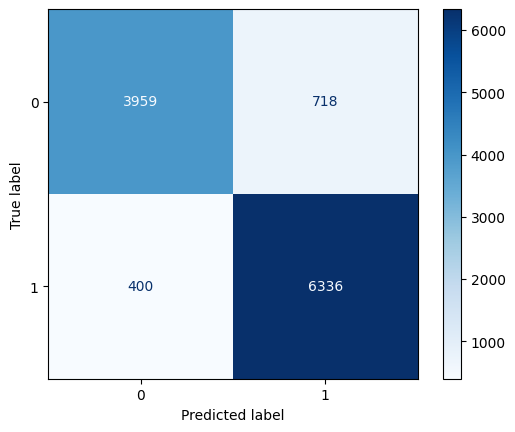

In [214]:
cm_rf = confusion_matrix(Y_test, y_pred_rf2)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.show()

Evaluación del modelo Random Forest

In [215]:
print("Random Forest Results:")
print(classification_report(Y_test, y_pred_rf2))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4677
           1       0.90      0.94      0.92      6736

    accuracy                           0.90     11413
   macro avg       0.90      0.89      0.90     11413
weighted avg       0.90      0.90      0.90     11413



Métricas de rendimiento de Random Forest

In [216]:
print('Exactitud RF: %.2f' % accuracy_score(Y_test, y_pred_rf2))
print("Recall RF: {}".format(recall_score(Y_test, y_pred_rf2)))
print("Precisión RF: {}".format(precision_score(Y_test, y_pred_rf2)))
print("Puntuación F1 RF: {}".format(f1_score(Y_test, y_pred_rf2)))

Exactitud RF: 0.90
Recall RF: 0.9406175771971497
Precisión RF: 0.8982137794159343
Puntuación F1 RF: 0.9189267585206672


Presenta un F1_ score de 0.93

Encontrar palabras importantes para el modelo

In [217]:
features_title = tfidf.get_feature_names_out()
features_desc = tfidf.get_feature_names_out()
all_features = np.concatenate((features_title, features_desc))
importancia_df = pd.DataFrame({"Atributo": all_features, "Importancia": rf.feature_importances_})
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False).reset_index(drop=True)
importancia_atributo = importancia_df.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo


,Atributo,Importancia
0,equ,0.027755
1,equipar,0.021657
2,carpetaz,0.017692
3,eduard,0.016687
4,brasil,0.015941
...,...,...
9995,pge,0.000000
9996,kim,0.000000
9997,estadunidens,0.000000
9998,esfer,0.000000


Ejemplos de algunos de los arboles generados

In [ ]:
# Crear la figura con 3 subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Graficamos 3 árboles distintos dentro del Random Forest
for i in range(3):
    plot_tree(rf.estimators_[i], max_depth=8, feature_names=all_features, class_names=["0", "1"], filled=True, fontsize=9, ax=axes[i])

plt.show()


Construcción del modelo con búsqueda de hiperparámetros.

In [219]:
# Dividimos el conjunto de entrenamiento en dos: una para la construcción del modelo (sería el nuevo conjunto de
# entrenamiento) y otro para la validación, el cuál será utilizado para determinar el rendimiento del modelo con una
# combinación específica de hiperparámetros.
X_trainval, X_val, Y_trainval, Y_val = train_test_split(X_train_smote, y_train_smote, test_size = 0.15, random_state = 0)

In [220]:
# Definir el modelo con los hiperparámetros ajustados
rf_model = RandomForestClassifier(
    n_estimators=5,  # Número de árboles en el bosque
    criterion='entropy',  # Criterio de división
    class_weight='balanced'  # Manejo del equilibrio de clases
)

# Entrenar el modelo
rf_model.fit(X_trainval,
             Y_trainval)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=5)

In [221]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = rf_model.predict(X_trainval)
y_pred_val = rf_model.predict(X_val)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_trainval, y_pred_train))
print('Exactitud sobre validación: %.2f' % accuracy_score(Y_val, y_pred_val))

Exactitud sobre entrenamiento: 0.99
Exactitud sobre validación: 0.88


In [222]:
# Definir el modelo con los hiperparámetros ajustados
rf_model = RandomForestClassifier(
    n_estimators=10,  # Número de árboles en el bosque
    criterion='entropy',  # Criterio de división
    class_weight='balanced'  # Manejo del equilibrio de clases
)

# Entrenar el modelo
rf_model.fit(X_trainval,
             Y_trainval)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10)

In [223]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = rf_model.predict(X_trainval)
y_pred_val = rf_model.predict(X_val)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_trainval, y_pred_train))
print('Exactitud sobre validación: %.2f' % accuracy_score(Y_val, y_pred_val))

Exactitud sobre entrenamiento: 1.00
Exactitud sobre validación: 0.90


In [224]:
# Definir el modelo con los hiperparámetros ajustados
rf_model = RandomForestClassifier(
    n_estimators=15,  # Número de árboles en el bosque
    criterion='entropy',  # Criterio de división
    class_weight='balanced'  # Manejo del equilibrio de clases
)

# Entrenar el modelo
rf_model.fit(X_trainval,
             Y_trainval)
#valores de exactitud sobre entrenamiento y test
y_pred_train = rf_model.predict(X_trainval)
y_pred_val = rf_model.predict(X_val)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_trainval, y_pred_train))
print('Exactitud sobre validación: %.2f' % accuracy_score(Y_val, y_pred_val))

Exactitud sobre entrenamiento: 1.00
Exactitud sobre validación: 0.90


In [225]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [226]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar.
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar.
param_grid = {'criterion':[ 'entropy'],'n_estimators':[5,10,20,30]}

In [227]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
RF = RandomForestClassifier(random_state=0)

In [228]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(RF, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy'],
                         'n_estimators': [5, 10, 20, 30]})

In [229]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'entropy', 'n_estimators': 30}

In [230]:
# Obtener el mejor modelo.
randomf = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = randomf.predict(X_train)
y_pred_test = randomf.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 1.00
Exactitud sobre test: 0.90


In [231]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar.
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar.
param_grid = {'criterion':[ 'entropy'],'max_depth':[5,10,20,30]}

In [232]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
RF = RandomForestClassifier(random_state=0)

In [233]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(RF, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [5, 10, 20, 30]})

Lo anterior evidencia que el mejor modelo es con 30 estimadores y que de esta manera se presenta una exactitud del 1.00 con los datos de entrenamiento y del 0,91 con los de test.

####4.3 Implementación decision tree classifier (Maria Alejandra Londoño)


In [246]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 7, random_state = 0, class_weight='balanced',  min_samples_leaf=30 )
arbol

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=30, random_state=0)

In [247]:
arbol = arbol.fit(X_train_smote, y_train_smote)

In [248]:
y_pred_ale = arbol.predict(X_test)

In [249]:
cm = confusion_matrix(Y_test, y_pred_ale)

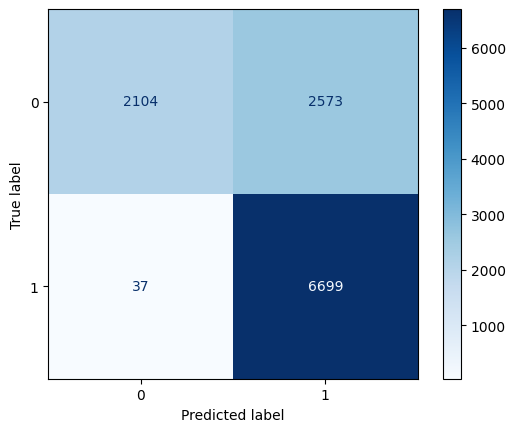

In [250]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [251]:
print("DecisionTreeClassifier Results:")
print(classification_report(Y_test, y_pred_ale))

DecisionTreeClassifier Results:
              precision    recall  f1-score   support

           0       0.98      0.45      0.62      4677
           1       0.72      0.99      0.84      6736

    accuracy                           0.77     11413
   macro avg       0.85      0.72      0.73     11413
weighted avg       0.83      0.77      0.75     11413



In [252]:
print('Exactitud RF: %.2f' % accuracy_score(Y_test, y_pred_ale))
print("Recall RF: {}".format(recall_score(Y_test, y_pred_ale)))
print("Precisión RF: {}".format(precision_score(Y_test, y_pred_ale)))
print("Puntuación F1 RF: {}".format(f1_score(Y_test, y_pred_ale)))

Exactitud RF: 0.77
Recall RF: 0.9945071258907363
Precisión RF: 0.722497842968076
Puntuación F1 RF: 0.8369565217391305


In [262]:
# Definir los parámetros a explorar
parametros = {
    'max_depth': [7, 12],
    'min_samples_leaf': [15, 30],
    'criterion': ['gini', 'entropy'],
    'class_weight':['balanced', None]
}


grid_search = GridSearchCV(arbol, parametros, scoring='f1', cv=5, n_jobs=1)

# Realizar la búsqueda con validación cruzada

grid_search.fit(X_train_smote, y_train_smote)

# Obtener el mejor modelo y sus parámetros
mejor_arbol = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 15}


In [263]:
arbol = DecisionTreeClassifier(criterion='gini', max_depth = 12, random_state = 0,  min_samples_leaf=15 )


In [264]:
arbol = arbol.fit(X_train,Y_train)

In [265]:
y_pred_ale = arbol.predict(X_test)

In [266]:
cm = confusion_matrix(Y_test, y_pred_ale)

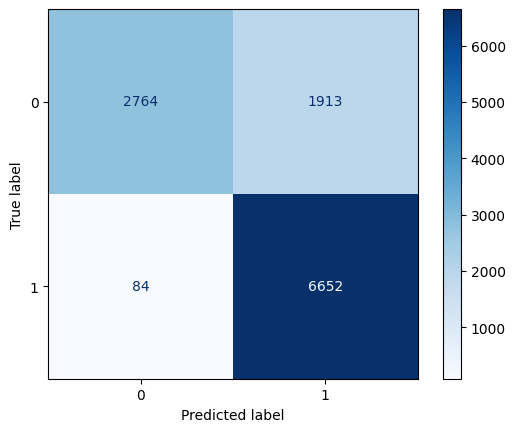

In [267]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [268]:
print("DecisionTreeClassifier Results:")
print(classification_report(Y_test, y_pred_ale))

DecisionTreeClassifier Results:
              precision    recall  f1-score   support

           0       0.97      0.59      0.73      4677
           1       0.78      0.99      0.87      6736

    accuracy                           0.83     11413
   macro avg       0.87      0.79      0.80     11413
weighted avg       0.86      0.83      0.81     11413



In [269]:
print('Exactitud RF: %.2f' % accuracy_score(Y_test, y_pred_ale))
print("Recall RF: {}".format(recall_score(Y_test, y_pred_ale)))
print("Precisión RF: {}".format(precision_score(Y_test, y_pred_ale)))
print("Puntuación F1 RF: {}".format(f1_score(Y_test, y_pred_ale)))

Exactitud RF: 0.83
Recall RF: 0.9875296912114014
Precisión RF: 0.7766491535318155
Puntuación F1 RF: 0.8694856545323836


#### 4.4 Multinomial Naive Bayes (Isabella Sarquis Buitrago)

In [254]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

MNB = MultinomialNB()
MNB.fit(X_train_smote, y_train_smote)

y_pred = MNB.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.8631
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      4677
           1       0.85      0.93      0.89      6736

    accuracy                           0.86     11413
   macro avg       0.87      0.85      0.86     11413
weighted avg       0.86      0.86      0.86     11413



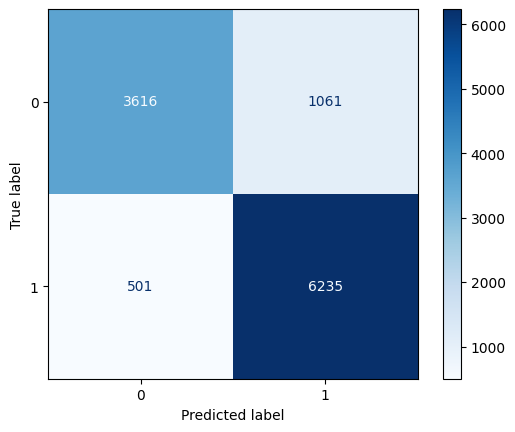

In [255]:
cm_rf = confusion_matrix(Y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=MNB.classes_)
disp_rf.plot(cmap=plt.cm.Blues)

plt.show()

Se grafica la distribución de probabilidad del modelo para observar la probabilidad de ser clasificada correctamente

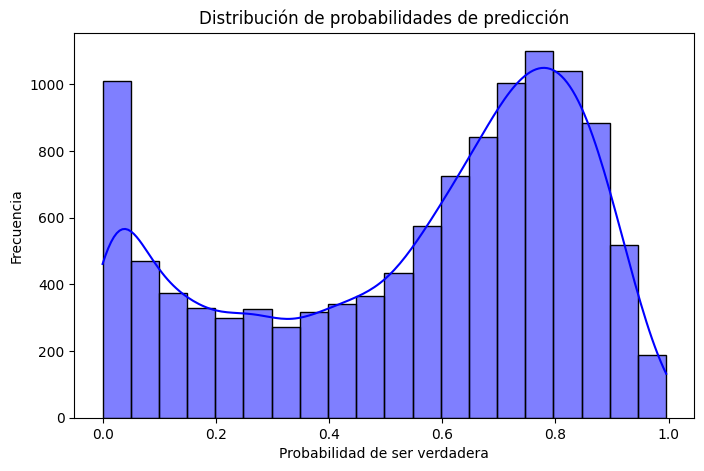

In [256]:
import seaborn as sns
probs = MNB.predict_proba(X_test)
plt.figure(figsize=(8, 5))
sns.histplot(probs[:, 1], bins=20, kde=True, color='blue')
plt.xlabel("Probabilidad de ser verdadera")
plt.ylabel("Frecuencia")
plt.title("Distribución de probabilidades de predicción")
plt.show()

Las palabras más importantes para clasificar una noticia como falsa

In [257]:

log_prob = MNB.feature_log_prob_
importance = np.exp(log_prob)

importancia_df = pd.DataFrame({
    "Atributo": all_features,
    "Importancia_Falsa": importance[0],  # Clase "falsa"
    "Importancia_Verdadera": importance[1]  # Clase "verdadera"
})

# Ordenar por importancia en noticias verdaderas
importancia_df = importancia_df.sort_values(by="Importancia_Falsa", ascending=False)

importancia_df[["Atributo", "Importancia_Falsa"]]

,Atributo,Importancia_Falsa
5934,cataluny,0.003391
8575,per,0.003308
7678,inici,0.003303
986,chat,0.003205
9880,vers,0.003160
...,...,...
7817,iu,0.000005
774,bonif,0.000005
2899,lapuert,0.000005
7353,garciagallard,0.000005


Las palabras más significativas en el modelo para clasificar una noticia como verdadera

In [258]:
importancia_df[["Atributo", "Importancia_Verdadera"]].sort_values(by="Importancia_Verdadera", ascending=False)

,Atributo,Importancia_Verdadera
3746,precedent,0.002952
2389,gobern,0.002939
7391,gobiern,0.002776
4302,salvini,0.002775
8521,part,0.002738
...,...,...
5360,alcon,0.000005
3693,politiz,0.000005
4657,tlcan,0.000005
3039,mallorc,0.000005


#### Hiperparámetros

In [259]:
param_grid = {"alpha": [0.1, 0.5, 1.0, 5.0, 10.0], "fit_prior": [True, False]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'fit_prior': [True, False]})

In [260]:
nb_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'alpha': 5.0, 'fit_prior': True}


In [261]:
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))
print(classification_report(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.88
Exactitud sobre test: 0.87
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4677
           1       0.86      0.92      0.89      6736

    accuracy                           0.87     11413
   macro avg       0.87      0.85      0.86     11413
weighted avg       0.87      0.87      0.86     11413



csv

In [ ]:
import joblib

# Guardar los modelos TF-IDF
joblib.dump(tfidf_title, "tfidf.pkl")

print("Modelos TF-IDF guardados correctamente.")

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import scipy.sparse as sp
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar recursos de NLTK (solo la primera vez)
nltk.download('stopwords')
nltk.download('punkt')

# Función para limpiar el texto
def clean_text(text):
    text = str(text).lower()  # Convertir a minúsculas
    text = re.sub(f"[{string.punctuation}]", "", text)  # Eliminar signos de puntuación
    words = word_tokenize(text)  # Tokenizar palabras
    words = [word for word in words if word not in stopwords.words('spanish')]  # Eliminar stopwords
    return " ".join(words)

# Cargar el archivo sin etiquetas
file_nuevos_datos = "/content/fake_news_test.csv"  # Ruta del archivo
nuevos_datos = pd.read_csv(file_nuevos_datos, sep=";", encoding="utf-8")
# Mostrar las primeras filas para verificar

# Aplicar limpieza de texto en Titulo y Descripcion
nuevos_datos['words_T'] = nuevos_datos['Titulo'].apply(preprocessing)
nuevos_datos['words_D'] = nuevos_datos['Descripcion'].apply(preprocessing)



In [ ]:
nuevos_datos['words_T'] = nuevos_datos['Titulo'].astype(str).apply(word_tokenize)
nuevos_datos['words_D'] = nuevos_datos['Descripcion'].astype(str).apply(word_tokenize)
nuevos_datos.head()

In [ ]:
nuevos_datos['words_T'] = nuevos_datos['words_T'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
nuevos_datos['words_D'] = nuevos_datos['words_D'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
nuevos_datos.head()

In [ ]:
nuevos_datos['words_T'] = nuevos_datos['words_T'].apply(lambda x: ' '.join(map(str, x)))
nuevos_datos['words_D'] = nuevos_datos['words_D'].apply(lambda x: ' '.join(map(str, x)))
nuevos_datos

In [ ]:
X_data2 = nuevos_datos[['words_T', 'words_D']]

In [ ]:
X_title_tfidf2 = tfidf.transform(X_data2['words_T'])
X_desc_tfidf2 = tfidf.transform(X_data2['words_D'])

In [ ]:
import scipy.sparse as sp
X_nuevos_tfidf = sp.hstack((X_title_tfidf2, X_desc_tfidf2))

In [ ]:
# 🔹 Cargar el mejor modelo entrenado de Random Forest
mejor_rf = joblib.load("random_forest_model.pkl")  # Cargar el modelo entrenado

# Generar predicciones
y_pred_nuevos = mejor_rf.predict(X_nuevos_tfidf)
print(f"Número de filas en nuevos_datos: {nuevos_datos.shape[0]}")
print(f"Número de filas en X_nuevos_tfidf: {X_nuevos_tfidf.shape[0]}")
print(f"Número de predicciones en y_pred_nuevos: {len(y_pred_nuevos)}")


# Agregar las predicciones al dataset original en la columna 'Label'
nuevos_datos['Label'] = y_pred_nuevos
# Seleccionar solo las columnas necesarias antes de guardar
columnas_necesarias = ['ID', 'Titulo', 'Descripcion', 'Fecha', 'Label']
nuevos_datos_filtrados = nuevos_datos[columnas_necesarias]
nuevos_datos_filtrados.to_csv("nuevos_datos_con_label.csv", index=False)

print("Archivo 'nuevos_datos_con_label.csv' generado con éxito.")